In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14,8
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# DATA CLEANING

In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.duplicated().sum()

1081

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.Amount.describe(include = "all")

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

# EXPLORATORY DATA ANALYSIS(EDA)

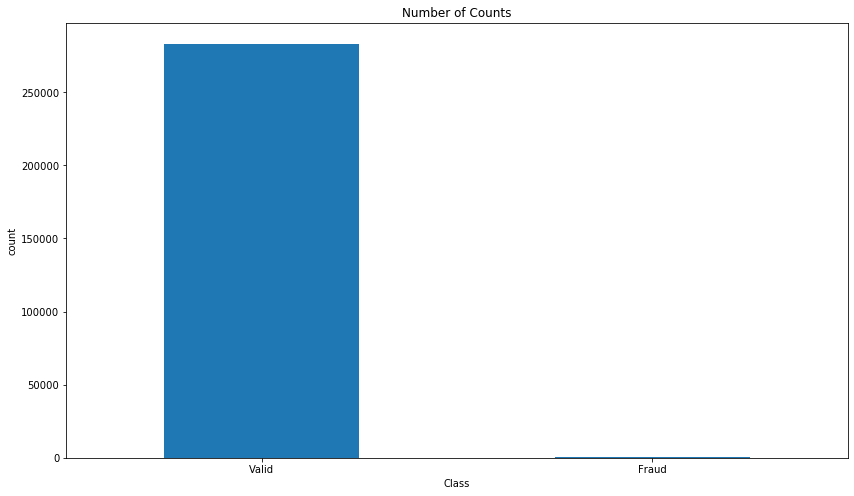

In [8]:
counts = pd.value_counts(df.Class, sort=True)
LABELS = ['Valid', 'Fraud']
counts.plot(kind = 'bar')
plt.xlabel("Class")
plt.ylabel("count")
plt.xticks(range(2),LABELS, rotation='horizontal')
plt.title("Number of Counts")
plt.show()

In [9]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

print(fraud.shape, valid.shape)

(473, 31) (283253, 31)


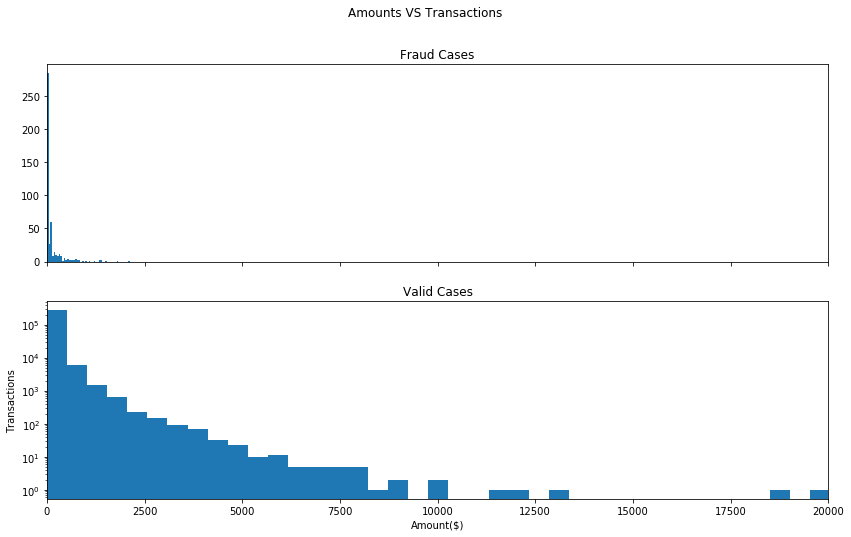

In [10]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amounts VS Transactions")
bins=50
ax1.hist(fraud.Amount, bins=bins)
ax2.hist(valid.Amount, bins= bins)
ax2.set_title("Valid Cases")
ax1.set_title("Fraud Cases")
plt.xlabel("Amount($)")
plt.ylabel("Transactions")
plt.xlim(0,20000)
plt.yscale('log')
plt.show()

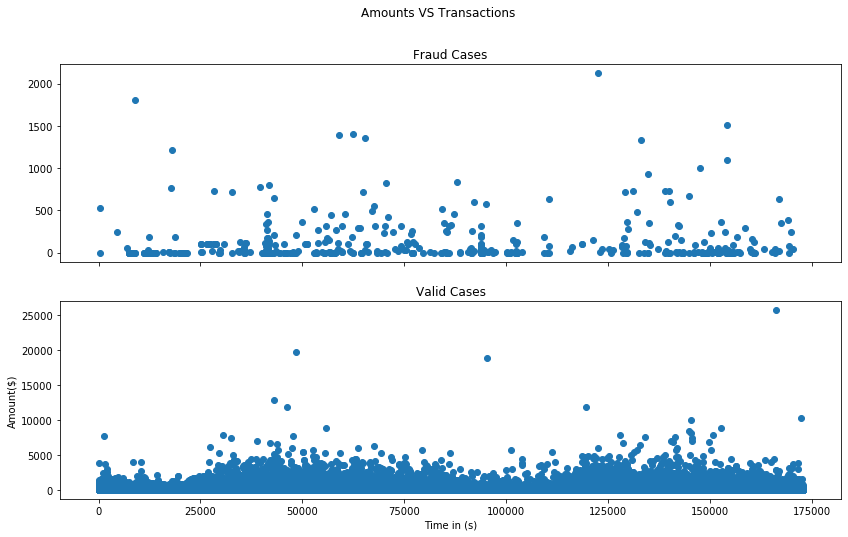

In [11]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Amounts VS Transactions")
bins=50
ax1.scatter(fraud.Time,fraud.Amount)
ax2.scatter(valid.Time, valid.Amount)
ax2.set_title("Valid Cases")
ax1.set_title("Fraud Cases")
plt.xlabel("Time in (s)")
plt.ylabel("Amount($)")
plt.show()

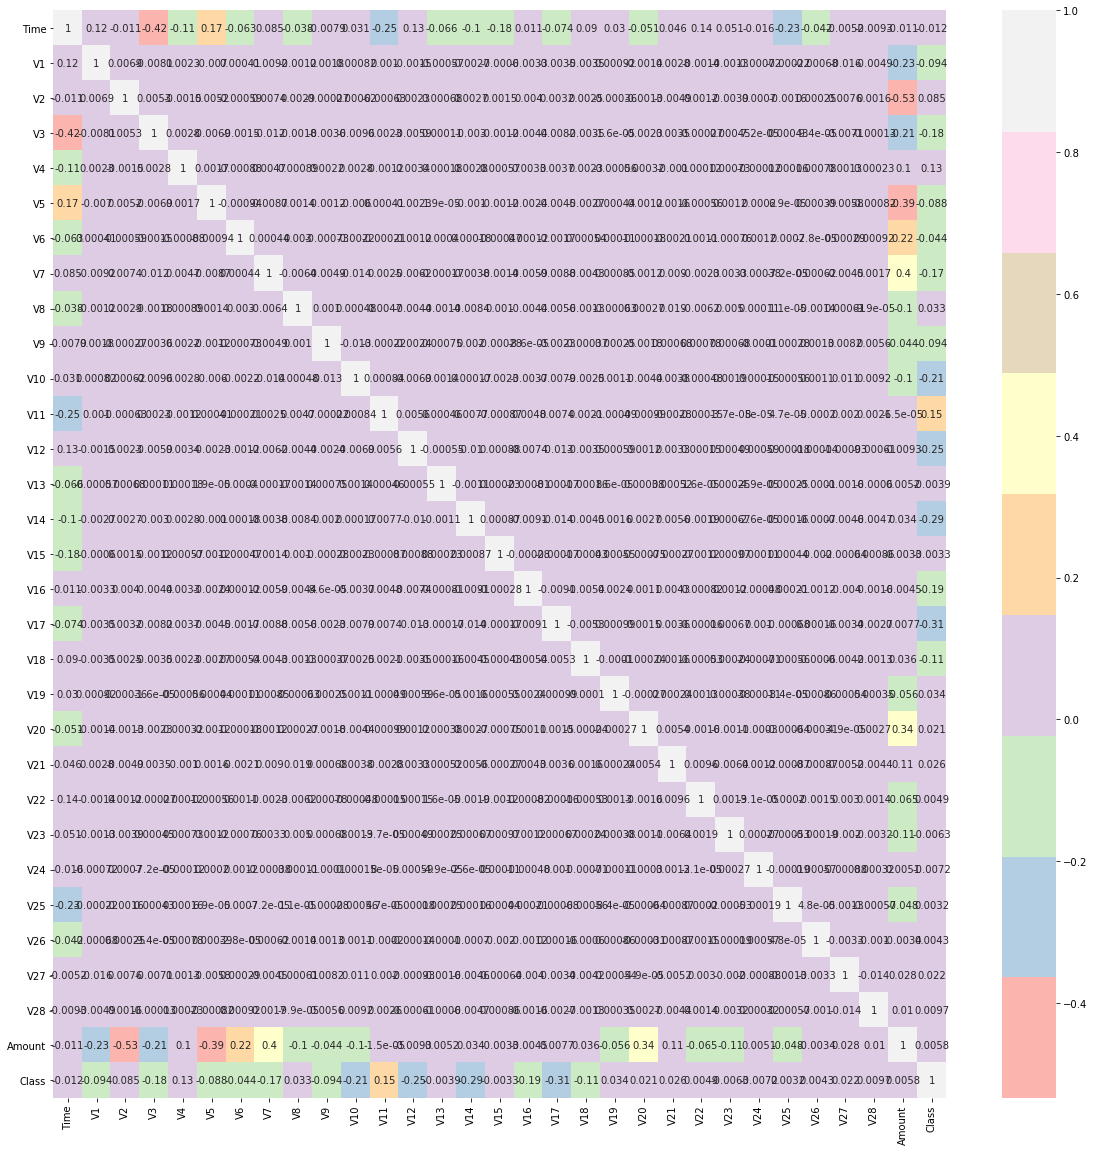

In [12]:
### it is neccessary to know the correlation between the independent Variables before going up to the Model selection
correlation = df.corr()
correlation_matrix = correlation.index

plt.figure(figsize=(20,20))
sns.heatmap(df[correlation_matrix].corr(), cmap = 'Pastel1', annot = True)

# MODEL SELECTION

In [13]:
data1 = df.sample(frac=0.1, random_state = 42)
data1.shape

(28373, 31)

In [14]:
valid_data = data1[data1['Class'] == 0]
fraud_data = data1[data1['Class'] == 1]

In [15]:
outlier_fraction = len(valid_data)/len(fraud_data)
print("outlier Fraction:{}".format(outlier_fraction))
print("valid Datas:{}".format(valid_data.shape[0]))
print("fraud Datas:{}".format(fraud_data.shape[0]))

outlier Fraction:674.547619047619
valid Datas:28331
fraud Datas:42


In [16]:
x = data1.drop("Class", axis=1).values
y = data1['Class'].values

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [18]:
pipeline_if = Pipeline([("Random Forest", RandomForestRegressor(n_estimators=100))])
pipeline_dt = Pipeline([("DecisionTree", DecisionTreeRegressor())])
pipeline_lr = Pipeline([("LogisticRegression", LogisticRegression(solver = 'lbfgs'))])

In [19]:
pipelines = [pipeline_if, pipeline_dt, pipeline_lr]

for pipes in pipelines:
    pipes.fit(x_train, y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
pipe_dict = { 0 : "RandomForest",
              1 : "DecisionTree",
              2 : "LogisticRegression"}

best_accuracy = 0
best_classifier = ""

In [21]:
for i,model in enumerate(pipelines):
    print("{} accuracy is:{}".format(pipe_dict[i], model.score(x_test, y_test)))

RandomForest accuracy is:0.5103456779228928
DecisionTree accuracy is:-0.0015884221673139187
LogisticRegression accuracy is:0.9989427312775331


In [22]:
for i,model in enumerate(pipelines):
    if  model.score(x_test, y_test)>best_accuracy:
        best_accuracy = model.score(x_test, y_test)
        best_pipline = model
        best_classifier = i
print("best Model is {}".format(pipe_dict[best_classifier]))

best Model is LogisticRegression
